In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Manufacturing Dataset.csv')

In [3]:
df.head()

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,NaN,1,23.8,37.9
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1
3,1900-01-03,2020-01-04,Appliances,11,Day,133,NaN,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,NaN,2,22.3,50.8
4,1900-01-04,2020-01-05,Electronics,14,Night,82,NaN,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9


In [ ]:
# why do certain machines experience high downtime ?

In [4]:
machine_downtime = (
    df.groupby('Machine ID')
      .agg(
          avg_downtime=('Down time Hours', 'mean'),
          avg_maintenance=('Maintenance Hours', 'mean'),
          avg_defects=('Defects', 'mean'),
          avg_units=('Units Produced', 'mean'),
          avg_energy=('Energy Consumption kWh', 'mean'),
          avg_temp=('Average Temperature C', 'mean'),
          avg_humidity=('Average Humidity Percent', 'mean')
      )
      .sort_values(by='avg_downtime', ascending=False)
)

In [5]:
machine_downtime

,avg_downtime,avg_maintenance,avg_defects,avg_units,avg_energy,avg_temp,avg_humidity
Machine ID,,,,,,,
8,1.637286,2.538603,4.842857,129.481013,290.062089,21.324684,45.591772
11,1.634247,2.476424,4.457746,120.766871,293.963436,21.355215,46.287117
6,1.633917,2.667667,4.512000,126.714286,304.243008,21.578195,44.847368
7,1.590633,2.367483,4.333333,128.620482,301.647590,21.585542,44.739157
17,1.584453,2.566277,4.481752,125.513158,287.401579,21.692105,45.201974
1,1.581854,2.457947,4.921053,133.840237,298.067929,21.593491,45.200592
18,1.573197,2.761371,5.034483,120.401515,306.264773,21.571212,44.325758
14,1.553769,2.561983,4.492063,126.805755,305.239353,21.515827,45.824460
5,1.541094,2.540444,4.552239,120.714286,286.168776,21.867347,45.000680


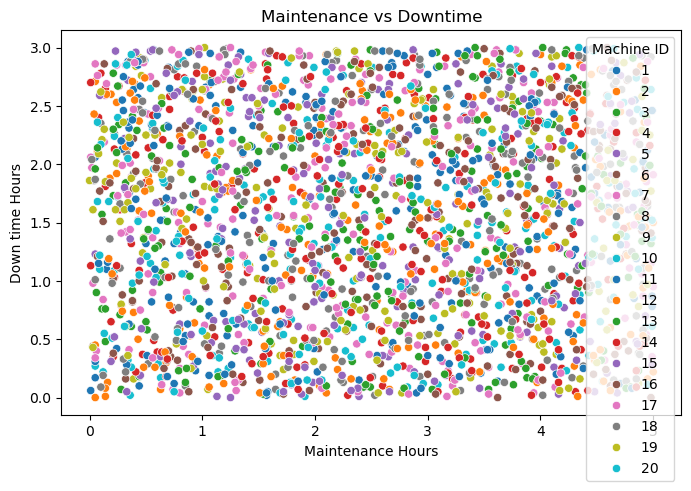

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Maintenance Hours',
    y='Down time Hours',
    hue='Machine ID',
    palette='tab10'
)
plt.title("Maintenance vs Downtime")
plt.show()

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date']).sort_values(['Machine ID', 'Date'])

df = df.sort_values(['Machine ID', 'Date'])

df['Maintenance Hours'] = pd.to_numeric(df['Maintenance Hours'], errors='coerce')
df['Down time Hours'] = pd.to_numeric(df['Down time Hours'], errors='coerce')

In [13]:
for lag in [1, 2, 3]:
    df[f'Maint_lag_{lag}'] = (
        df.groupby('Machine ID')['Maintenance Hours']
          .shift(lag)
    )


In [14]:
results = []

for lag in [1, 2, 3]:
    corr = df[['Down time Hours', f'Maint_lag_{lag}']].dropna().corr().iloc[0, 1]
    results.append({
        'Lag_Days': lag,
        'Correlation': corr
    })

lag_correlation = pd.DataFrame(results)
print(lag_correlation)


   Lag_Days  Correlation
0         1     0.001865
1         2     0.002143
2         3    -0.000716


In [15]:
machine_results = []

for machine in df['Machine ID'].unique():
    sub = df[df['Machine ID'] == machine]

    for lag in [1, 2, 3]:
        corr = (
            sub[['Down time Hours', f'Maint_lag_{lag}']]
            .dropna()
            .corr()
            .iloc[0, 1]
        )

        machine_results.append({
            'Machine ID': machine,
            'Lag': lag,
            'Correlation': corr
        })

machine_corr = pd.DataFrame(machine_results)
print(machine_corr.sort_values(by='Correlation'))


    Machine ID  Lag  Correlation
55          19    2    -0.249351
23           8    3    -0.238509
28          10    2    -0.156692
53          18    3    -0.135959
46          16    2    -0.135070
57          20    1    -0.126622
33          12    1    -0.124625
45          16    1    -0.116758
18           7    1    -0.109675
41          14    3    -0.100234
59          20    3    -0.086295
24           9    1    -0.076038
40          14    2    -0.075856
51          18    1    -0.070465
29          10    3    -0.063365
25           9    2    -0.061427
15           6    1    -0.053252
11           4    3    -0.039074
34          12    2    -0.038841
7            3    2    -0.031195
30          11    1    -0.015626
13           5    2    -0.015349
31          11    2    -0.010193
26           9    3    -0.008666
21           8    1    -0.005457
37          13    2    -0.002725
50          17    3    -0.000055
9            4    1     0.002535
0            1    1     0.009062
42        

In [16]:
optimal_lag = (
    lag_correlation
    .loc[lag_correlation['Correlation'].idxmin()]
)

print("Optimal preventive maintenance lag:")
print(optimal_lag)


Optimal preventive maintenance lag:
Lag_Days       3.000000
Correlation   -0.000716
Name: 2, dtype: float64


In [25]:
# why night shift shows higher defect rates ?

In [26]:
df.groupby('Shift')['Defects'].sum()

Shift
Day      4070.0
Night    4196.0
Swing    4193.0
Name: Defects, dtype: float64

In [22]:
# which products contribute to more scrap cost ?

In [18]:
df.columns

Index(['Production ID', 'Date', 'Product Type', 'Machine ID', 'Shift',
       'Units Produced', 'Defects', 'Production Time Hours',
       'Material Cost Per Unit', 'Labour Cost Per Hour',
       'Energy Consumption kWh', 'Operator Count', 'Maintenance Hours',
       'Down time Hours', 'Production Volume Cubic Meters', 'Scrap Rate',
       'Rework Hours', 'Quality Checks Failed', 'Average Temperature C',
       'Average Humidity Percent', 'Maint_lag_1', 'Maint_lag_2',
       'Maint_lag_3'],
      dtype='object')

In [19]:
# Calculate scrap cost
df["ScrapCost"] = df["Units Produced"] * df["Scrap Rate"] * df["Material Cost Per Unit"]

In [20]:
# Pareto aggregation
pareto = (
    df.groupby("Product Type", as_index=False)["ScrapCost"]
    .sum()
    .sort_values("ScrapCost", ascending=False)
)

In [21]:
# Cumulative percentage
pareto["CumulativeScrapCost"] = pareto["ScrapCost"].cumsum()
pareto["CumulativePercent"] = pareto["CumulativeScrapCost"] / pareto["ScrapCost"].sum() * 100

pareto

,Product Type,ScrapCost,CumulativeScrapCost,CumulativePercent
1,Automotive,76238.95714,76238.95714,22.142406
0,Appliances,69067.25739,145306.21453,42.201905
2,Electronics,67066.96843,212373.18296,61.680451
3,Furniture,66003.82321,278377.00617,80.850223
4,Textiles,65934.97652,344311.98269,100.000000
